In [ ]:
# Comando de abertura para Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Instalando pacotes necessários para execução da visualização
!pip install geopandas -q
!pip install plotly -q

In [ ]:
# Abertura de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

In [ ]:
# Base de dados dos municipios do Brasil
df_mapa = gpd.read_file('/content/drive/MyDrive/Dados/SoulCode - Bootcamp/Afalbetização/BR_Municipios_2022/BR_Municipios_2022.shp')

In [ ]:
#renomeação
# Renomeação
df_mapa = df_mapa.rename({'CD_MUN': 'CODIGO'}, axis = 1)
df_mapa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CODIGO    5572 non-null   object  
 1   NM_MUN    5572 non-null   object  
 2   SIGLA_UF  5572 non-null   object  
 3   AREA_KM2  5572 non-null   float64 
 4   geometry  5572 non-null   geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 217.8+ KB


In [ ]:
df_mapa

CODIGO                 NM_MUN SIGLA_UF  AREA_KM2  \
0     1100015  Alta Floresta D'Oeste       RO  7067.127   
1     1100023              Ariquemes       RO  4426.571   
2     1100031                 Cabixi       RO  1314.352   
3     1100049                 Cacoal       RO  3793.000   
4     1100056             Cerejeiras       RO  2783.300   
...       ...                    ...      ...       ...   
5567  5222005             Vianópolis       GO   954.115   
5568  5222054         Vicentinópolis       GO   733.794   
5569  5222203               Vila Boa       GO  1052.593   
5570  5222302          Vila Propício       GO  2181.593   
5571  5300108               Brasília       DF  5760.784   

                                               geometry  
0     POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...  
1     POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...  
2     POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...  
3     POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...  
4     POLYGON ((-60.82135 -13.11910, -60.81773 -13.1...  
...                                                 ...  
5567  POLYGON ((-48.31126 -16.84221, -48.31170 -16.8...  
5568  POLYGON ((-49.73613 -17.74427, -49.73624 -17.7...  
5569  POLYGON ((-47.07780 -15.06364, -47.07799 -15.0...  
5570  POLYGON ((-48.58713 -15.31847, -48.58714 -15.3...  
5571  POLYGON ((-48.01472 -16.04996, -48.01573 -16.0...  

[5572 rows x 5 columns]

In [ ]:
# Base de dados dos municipios do Brasil
df_dados = pd.read_excel('/content/drive/MyDrive/Dados/SoulCode - Bootcamp/Afalbetização/tabela9542.xlsx')

In [ ]:
# Renomeando a Coluna Cód. do conjunto de dados df_dados
df_dados = df_dados.rename({'Cód.': 'CODIGO'}, axis = 1)

In [ ]:
df_dados

Nível   CODIGO                   Município Cor ou raça  Idade  \
0       MU  1100015  Alta Floresta D'Oeste (RO)       Total  Total   
1       MU  1100023              Ariquemes (RO)       Total  Total   
2       MU  1100031                 Cabixi (RO)       Total  Total   
3       MU  1100049                 Cacoal (RO)       Total  Total   
4       MU  1100056             Cerejeiras (RO)       Total  Total   
...    ...      ...                         ...         ...    ...   
5565    MU  5222005             Vianópolis (GO)       Total  Total   
5566    MU  5222054         Vicentinópolis (GO)       Total  Total   
5567    MU  5222203               Vila Boa (GO)       Total  Total   
5568    MU  5222302          Vila Propício (GO)       Total  Total   
5569    MU  5300108               Brasília (DF)       Total  Total   

      Não_alfabetizadas_2022  
0                       1419  
1                       4480  
2                        433  
3                       4363  
4                        982  
...                      ...  
5565                     780  
5566                     634  
5567                     409  
5568                     660  
5569                   63282  

[5570 rows x 6 columns]

In [ ]:
# Alterando o tipo de dado
df_mapa['CODIGO'] = df_mapa['CODIGO'].astype(str)
df_dados['CODIGO'] = df_dados['CODIGO'].astype(str)

In [ ]:
# União dos dataframe mapa e dados
uniao_oficial = df_mapa.merge(df_dados, on = "CODIGO", how = "left")

In [ ]:
uniao_oficial

CODIGO                 NM_MUN SIGLA_UF  AREA_KM2  \
0     1100015  Alta Floresta D'Oeste       RO  7067.127   
1     1100023              Ariquemes       RO  4426.571   
2     1100031                 Cabixi       RO  1314.352   
3     1100049                 Cacoal       RO  3793.000   
4     1100056             Cerejeiras       RO  2783.300   
...       ...                    ...      ...       ...   
5567  5222005             Vianópolis       GO   954.115   
5568  5222054         Vicentinópolis       GO   733.794   
5569  5222203               Vila Boa       GO  1052.593   
5570  5222302          Vila Propício       GO  2181.593   
5571  5300108               Brasília       DF  5760.784   

                                               geometry Nível  \
0     POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...    MU   
1     POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...    MU   
2     POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...    MU   
3     POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...    MU   
4     POLYGON ((-60.82135 -13.11910, -60.81773 -13.1...    MU   
...                                                 ...   ...   
5567  POLYGON ((-48.31126 -16.84221, -48.31170 -16.8...    MU   
5568  POLYGON ((-49.73613 -17.74427, -49.73624 -17.7...    MU   
5569  POLYGON ((-47.07780 -15.06364, -47.07799 -15.0...    MU   
5570  POLYGON ((-48.58713 -15.31847, -48.58714 -15.3...    MU   
5571  POLYGON ((-48.01472 -16.04996, -48.01573 -16.0...    MU   

                       Município Cor ou raça  Idade  Não_alfabetizadas_2022  
0     Alta Floresta D'Oeste (RO)       Total  Total                  1419.0  
1                 Ariquemes (RO)       Total  Total                  4480.0  
2                    Cabixi (RO)       Total  Total                   433.0  
3                    Cacoal (RO)       Total  Total                  4363.0  
4                Cerejeiras (RO)       Total  Total                   982.0  
...                          ...         ...    ...                     ...  
5567             Vianópolis (GO)       Total  Total                   780.0  
5568         Vicentinópolis (GO)       Total  Total                   634.0  
5569               Vila Boa (GO)       Total  Total                   409.0  
5570          Vila Propício (GO)       Total  Total                   660.0  
5571               Brasília (DF)       Total  Total                 63282.0  

[5572 rows x 10 columns]

In [ ]:
# Valores nulos
uniao_oficial.isnull().sum()

CODIGO                    0
NM_MUN                    0
SIGLA_UF                  0
AREA_KM2                  0
geometry                  0
Nível                     2
Município                 2
Cor ou raça               2
Idade                     2
Não_alfabetizadas_2022    2
dtype: int64

In [ ]:
# Filtrando os valores vazios
uniao_oficial[uniao_oficial['Não_alfabetizadas_2022'].isna()]

CODIGO           NM_MUN SIGLA_UF   AREA_KM2  \
4606  4300001      Lagoa Mirim       RS   2884.340   
4607  4300002  Lagoa dos Patos       RS  10201.524   

                                               geometry Nível Município  \
4606  POLYGON ((-52.62752 -32.15022, -52.62816 -32.1...   NaN       NaN   
4607  POLYGON ((-52.09720 -32.16167, -52.09926 -32.1...   NaN       NaN   

     Cor ou raça Idade  Não_alfabetizadas_2022  
4606         NaN   NaN                     NaN  
4607         NaN   NaN                     NaN

In [ ]:
# Eliminando os valores vazios
uniao_oficial = uniao_oficial.dropna()

In [ ]:
uniao_oficial.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5570 entries, 0 to 5571
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CODIGO                  5570 non-null   object  
 1   NM_MUN                  5570 non-null   object  
 2   SIGLA_UF                5570 non-null   object  
 3   AREA_KM2                5570 non-null   float64 
 4   geometry                5570 non-null   geometry
 5   Nível                   5570 non-null   object  
 6   Município               5570 non-null   object  
 7   Cor ou raça             5570 non-null   object  
 8   Idade                   5570 non-null   object  
 9   Não_alfabetizadas_2022  5570 non-null   float64 
dtypes: float64(2), geometry(1), object(7)
memory usage: 478.7+ KB


In [ ]:
uniao_oficial.head()

CODIGO                 NM_MUN SIGLA_UF  AREA_KM2  \
0  1100015  Alta Floresta D'Oeste       RO  7067.127   
1  1100023              Ariquemes       RO  4426.571   
2  1100031                 Cabixi       RO  1314.352   
3  1100049                 Cacoal       RO  3793.000   
4  1100056             Cerejeiras       RO  2783.300   

                                            geometry Nível  \
0  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...    MU   
1  POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...    MU   
2  POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...    MU   
3  POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...    MU   
4  POLYGON ((-60.82135 -13.11910, -60.81773 -13.1...    MU   

                    Município Cor ou raça  Idade  Não_alfabetizadas_2022  
0  Alta Floresta D'Oeste (RO)       Total  Total                  1419.0  
1              Ariquemes (RO)       Total  Total                  4480.0  
2                 Cabixi (RO)       Total  Total                   433.0  
3                 Cacoal (RO)       Total  Total                  4363.0  
4             Cerejeiras (RO)       Total  Total                   982.0

In [ ]:
# Transformando as informações
uniao_oficial['Não_alfabetizadas_2022'] = uniao_oficial['Não_alfabetizadas_2022'].astype(int)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
uniao_oficial.head()

CODIGO                 NM_MUN SIGLA_UF  AREA_KM2  \
0  1100015  Alta Floresta D'Oeste       RO  7067.127   
1  1100023              Ariquemes       RO  4426.571   
2  1100031                 Cabixi       RO  1314.352   
3  1100049                 Cacoal       RO  3793.000   
4  1100056             Cerejeiras       RO  2783.300   

                                            geometry Nível  \
0  POLYGON ((-62.00806 -12.13379, -62.00784 -12.2...    MU   
1  POLYGON ((-63.17933 -10.13924, -63.17746 -10.1...    MU   
2  POLYGON ((-60.52408 -13.32137, -60.37162 -13.3...    MU   
3  POLYGON ((-61.35502 -11.50452, -61.35524 -11.5...    MU   
4  POLYGON ((-60.82135 -13.11910, -60.81773 -13.1...    MU   

                    Município Cor ou raça  Idade  Não_alfabetizadas_2022  
0  Alta Floresta D'Oeste (RO)       Total  Total                    1419  
1              Ariquemes (RO)       Total  Total                    4480  
2                 Cabixi (RO)       Total  Total                     433  
3                 Cacoal (RO)       Total  Total                    4363  
4             Cerejeiras (RO)       Total  Total                     982

In [ ]:
uniao_oficial.describe()

AREA_KM2  Não_alfabetizadas_2022
count    5570.000000             5570.000000
mean     1525.553304             2047.361041
std      5605.417197             5275.921510
min         3.565000               20.000000
25%       204.755250              397.000000
50%       417.692500              939.500000
75%      1026.610000             2248.000000
max    159533.306000           245357.000000

In [ ]:
# Municipio com maior valor de analfabetos
uniao_oficial[uniao_oficial['Não_alfabetizadas_2022'] == 245357]

CODIGO     NM_MUN SIGLA_UF  AREA_KM2  \
3829  3550308  São Paulo       SP  1521.202   

                                               geometry Nível       Município  \
3829  POLYGON ((-46.63512 -23.83850, -46.63455 -23.8...    MU  São Paulo (SP)   

     Cor ou raça  Idade  Não_alfabetizadas_2022  
3829       Total  Total                  245357

In [ ]:
# Municipio com menor valor de analfabetos
uniao_oficial[uniao_oficial['Não_alfabetizadas_2022'] == 20]

CODIGO                 NM_MUN SIGLA_UF  AREA_KM2  \
4837  4311270  Lagoa dos Três Cantos       RS   138.602   

                                               geometry Nível  \
4837  POLYGON ((-52.85270 -28.60154, -52.86360 -28.5...    MU   

                       Município Cor ou raça  Idade  Não_alfabetizadas_2022  
4837  Lagoa dos Três Cantos (RS)       Total  Total                      20

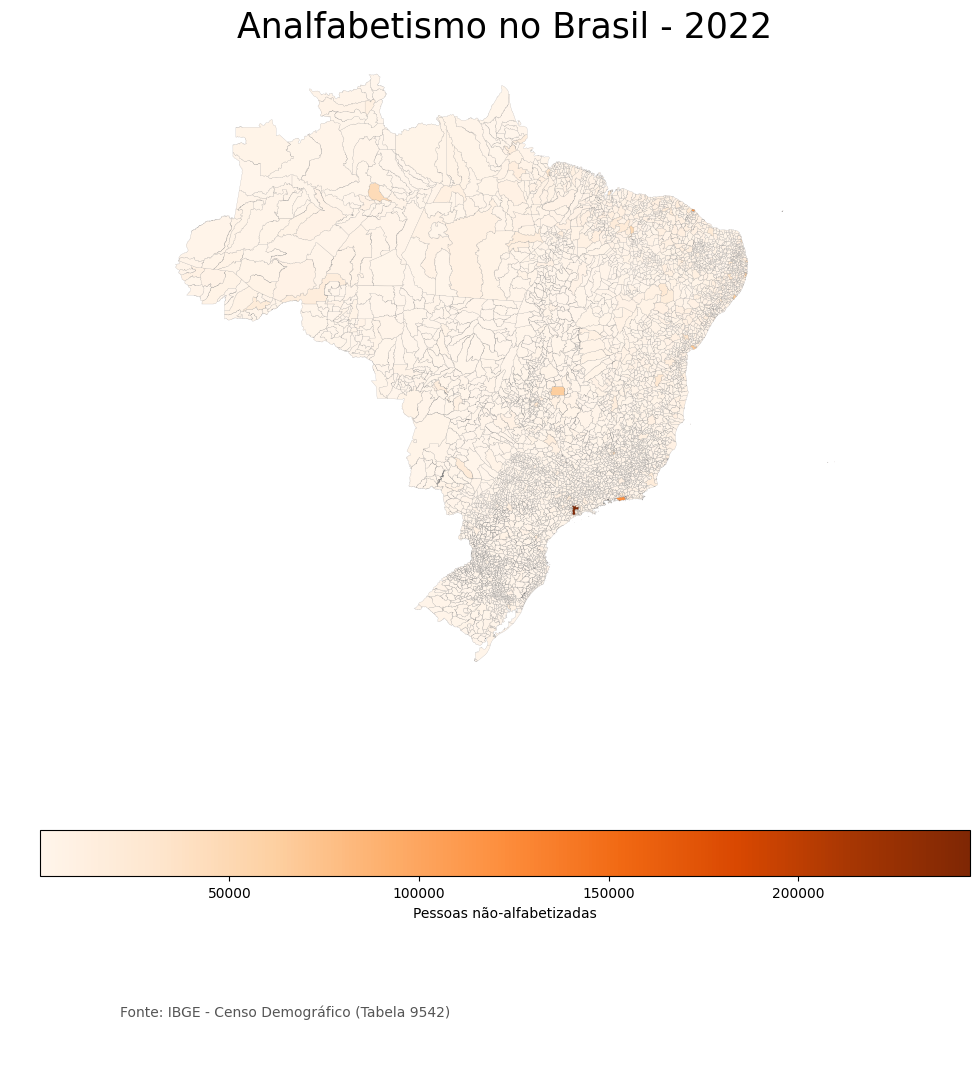

In [ ]:
# Expandir o tamanho do mapa
fig, ax = plt.subplots(1, figsize = (12,12))

# Desenhar o mapa
ax = uniao_oficial.plot(column='Não_alfabetizadas_2022',
                        cmap='Oranges',
                        linewidth=.1,
                        ax=ax,
                        edgecolor='gray',
                        legend=True,
                        legend_kwds={'label': "Pessoas não-alfabetizadas", 'orientation': "horizontal"})

# Tirar os eixos do mapa
ax.set_axis_off()

#Colocando título
ax.set_title('Analfabetismo no Brasil - 2022', fontdict={'fontsize':'25',
                                                         'fontweight': '3'})

# Nota de rodapé
ax.annotate('Fonte: IBGE - Censo Demográfico (Tabela 9542)',
            xy=(0.1, 0.05),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=10,
            color='#555555')

# Mostrar o mapa
plt.show()

In [ ]:
# Filtrar apenas as linhas onde 'SIGLA_UF' é 'PE'
uniao_oficial_PE = uniao_oficial[uniao_oficial['SIGLA_UF'] == 'PE']

In [ ]:
uniao_oficial_PE

CODIGO                  NM_MUN SIGLA_UF  AREA_KM2  \
1465  2600054            Abreu e Lima       PE   126.384   
1466  2600104   Afogados da Ingazeira       PE   377.696   
1467  2600203                 Afrânio       PE  1490.594   
1468  2600302               Agrestina       PE   200.369   
1469  2600401              Água Preta       PE   531.935   
...       ...                     ...      ...       ...   
1645  2616183       Vertente do Lério       PE    73.631   
1646  2616209               Vertentes       PE   196.325   
1647  2616308                Vicência       PE   228.017   
1648  2616407  Vitória de Santo Antão       PE   336.573   
1649  2616506                   Xexéu       PE   110.815   

                                               geometry Nível  \
1465  POLYGON ((-34.91480 -7.92760, -34.91576 -7.927...    MU   
1466  POLYGON ((-37.66490 -7.83209, -37.66622 -7.830...    MU   
1467  POLYGON ((-41.03831 -8.78485, -41.03979 -8.784...    MU   
1468  POLYGON ((-35.94151 -8.53737, -35.94532 -8.536...    MU   
1469  POLYGON ((-35.38049 -8.71793, -35.36990 -8.719...    MU   
...                                                 ...   ...   
1645  POLYGON ((-35.79532 -7.74008, -35.79478 -7.739...    MU   
1646  POLYGON ((-35.91133 -7.87919, -35.91045 -7.889...    MU   
1647  POLYGON ((-35.37240 -7.61299, -35.36892 -7.611...    MU   
1648  POLYGON ((-35.30115 -8.06850, -35.29777 -8.070...    MU   
1649  POLYGON ((-35.62236 -8.80800, -35.62241 -8.810...    MU   

                        Município Cor ou raça  Idade  Não_alfabetizadas_2022  
1465            Abreu e Lima (PE)       Total  Total                    6733  
1466   Afogados da Ingazeira (PE)       Total  Total                    4795  
1467                 Afrânio (PE)       Total  Total                    2659  
1468               Agrestina (PE)       Total  Total                    4373  
1469              Água Preta (PE)       Total  Total                    4744  
...                           ...         ...    ...                     ...  
1645       Vertente do Lério (PE)       Total  Total                    1665  
1646               Vertentes (PE)       Total  Total                    3335  
1647                Vicência (PE)       Total  Total                    4161  
1648  Vitória de Santo Antão (PE)       Total  Total                   16462  
1649                   Xexéu (PE)       Total  Total                    2268  

[185 rows x 10 columns]

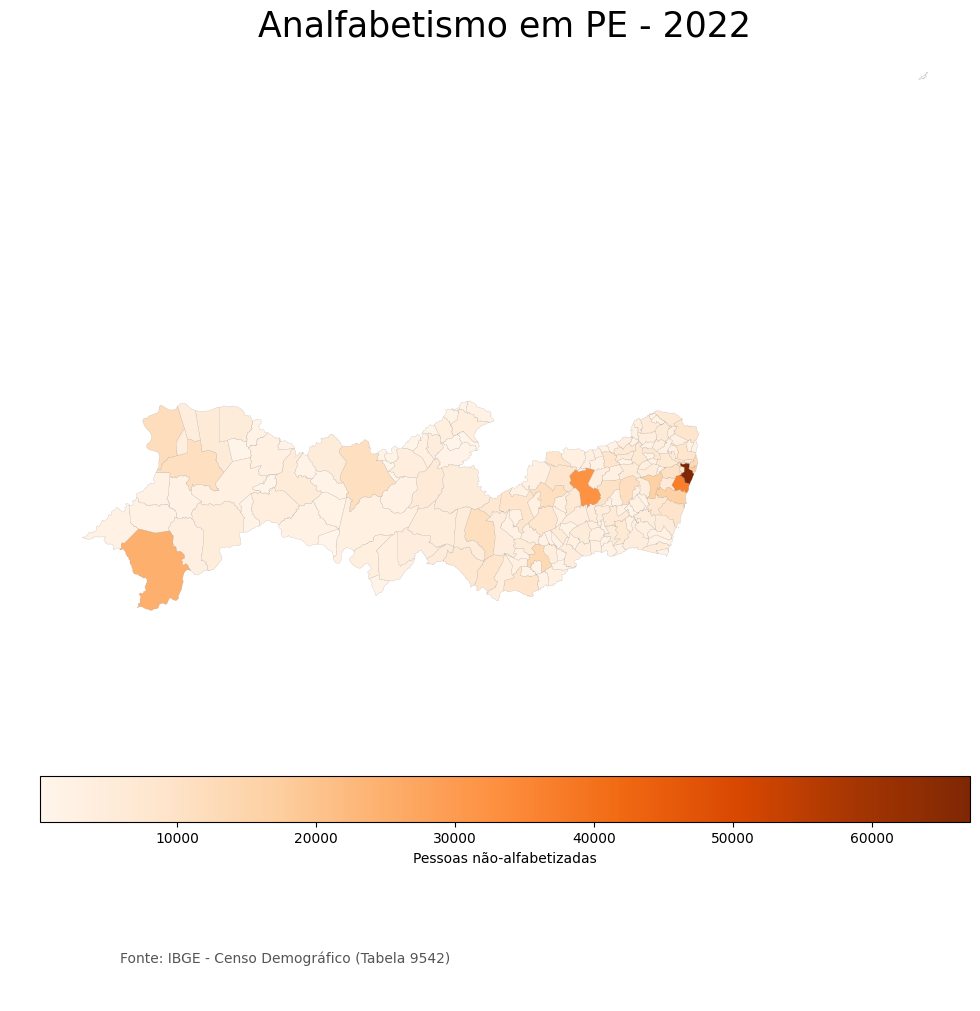

In [ ]:
# Expandir o tamanho do mapa
fig, ax = plt.subplots(1, figsize = (12,12))

# Desenhar o mapa
ax = uniao_oficial_PE.plot(column='Não_alfabetizadas_2022',
                        cmap='Oranges',
                        linewidth=.1,
                        ax=ax,
                        edgecolor='gray',
                        legend=True,
                        legend_kwds={'label': "Pessoas não-alfabetizadas", 'orientation': "horizontal"})

# Tirar os eixos do mapa
ax.set_axis_off()

#Colocando título
ax.set_title('Analfabetismo em PE - 2022', fontdict={'fontsize':'25',
                                                         'fontweight': '3'})

# Nota de rodapé
ax.annotate('Fonte: IBGE - Censo Demográfico (Tabela 9542)',
            xy=(0.1, 0.05),
            xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='top',
            fontsize=10,
            color='#555555')

# Mostrar o mapa
plt.show()

In [ ]:
uniao_oficial_PE.describe()

AREA_KM2  Não_alfabetizadas_2022
count   185.000000              185.000000
mean    530.096665             5194.372973
std     684.175216             6558.359034
min      18.609000               95.000000
25%     147.017000             2248.000000
50%     263.687000             3455.000000
75%     531.935000             5721.000000
max    4561.870000            67090.000000

In [ ]:
# Municipio com menor valor de analfabetos
uniao_oficial_PE[uniao_oficial_PE['Não_alfabetizadas_2022'] == 95]

CODIGO               NM_MUN SIGLA_UF  AREA_KM2  \
1525  2605459  Fernando de Noronha       PE    18.609   

                                               geometry Nível  \
1525  MULTIPOLYGON (((-32.43842 -3.87209, -32.43832 ...    MU   

                     Município Cor ou raça  Idade  Não_alfabetizadas_2022  
1525  Fernando de Noronha (PE)       Total  Total                      95

In [ ]:
# Municipio com maior valor de analfabetos
uniao_oficial_PE[uniao_oficial_PE['Não_alfabetizadas_2022'] == 67090]

CODIGO  NM_MUN SIGLA_UF  AREA_KM2  \
1596  2611606  Recife       PE   218.843   

                                               geometry Nível    Município  \
1596  POLYGON ((-34.91800 -8.14310, -34.91814 -8.143...    MU  Recife (PE)   

     Cor ou raça  Idade  Não_alfabetizadas_2022  
1596       Total  Total                   67090

In [ ]:
# Obtendo os 5 municípios com o maior número de pessoas não alfabetizadas
top_5_municipios = uniao_oficial_PE.nlargest(5, 'Não_alfabetizadas_2022')

# Exibindo o resultado
top_5_municipios


CODIGO                   NM_MUN SIGLA_UF  AREA_KM2  \
1596  2611606                   Recife       PE   218.843   
1552  2607901  Jaboatão dos Guararapes       PE   258.724   
1509  2604106                  Caruaru       PE   923.150   
1590  2611101                Petrolina       PE  4561.870   
1575  2609600                   Olinda       PE    41.300   

                                               geometry Nível  \
1596  POLYGON ((-34.91800 -8.14310, -34.91814 -8.143...    MU   
1552  POLYGON ((-34.94633 -8.23665, -34.94695 -8.235...    MU   
1509  POLYGON ((-35.85247 -8.27023, -35.85229 -8.270...    MU   
1590  POLYGON ((-40.44869 -9.38938, -40.44939 -9.390...    MU   
1575  POLYGON ((-34.83877 -8.00057, -34.83890 -8.001...    MU   

                         Município Cor ou raça  Idade  Não_alfabetizadas_2022  
1596                   Recife (PE)       Total  Total                   67090  
1552  Jaboatão dos Guararapes (PE)       Total  Total                   37234  
1509                  Caruaru (PE)       Total  Total                   32332  
1590                Petrolina (PE)       Total  Total                   24891  
1575                   Olinda (PE)       Total  Total                   17286

In [ ]:
municipio_nome = "Igarassu"
municipio_especifico = uniao_oficial_PE.loc[uniao_oficial_PE['NM_MUN'] == municipio_nome]

# Exibindo o resultado
municipio_especifico


CODIGO    NM_MUN SIGLA_UF  AREA_KM2  \
1539  2606804  Igarassu       PE   306.879   

                                               geometry Nível      Município  \
1539  POLYGON ((-34.90949 -7.80506, -34.90831 -7.805...    MU  Igarassu (PE)   

     Cor ou raça  Idade  Não_alfabetizadas_2022  
1539       Total  Total                    9167

In [ ]:
# Crie um GeoDataFrame
gdf = gpd.GeoDataFrame(uniao_oficial_PE, geometry='geometry')

# Crie o mapa interativo usando Plotly
fig = px.choropleth(gdf,
                    geojson=gdf.geometry,
                    locations=gdf.index,
                    color="Não_alfabetizadas_2022",
                    color_continuous_scale="Mint",
                    hover_name="NM_MUN",
                    hover_data={"AREA_KM2": True, "Não_alfabetizadas_2022": True},
                    labels={"Não_alfabetizadas_2022": "Não Alfabetizadas (2022)"},
                    )

# Atualize o layout do mapa
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Mostre o mapa
fig.show()